In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

p_data_raw = os.path.abspath('data') # raw data path

emails = pd.read_csv(p_data_raw+'/yammer_emails.csv')
users = pd.read_excel(p_data_raw+'/yammer_users.xlsx',
                      sheet_name='yammer_users.csv')
experiments = pd.read_excel(p_data_raw+'/yammer_experiments.xlsx',
                            sheet_name='yammer_experiments.csv')
events = pd.read_excel(p_data_raw+'/yammer_events.xlsx',
                       sheet_name='yammer_events.csv')
dimension_rollup_periods = pd.read_excel(p_data_raw+'/dimension_rollup_periods.xlsx',
                                         sheet_name='dimension_rollup_periods.csv')

**Table "users"**

In [2]:
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0,2013-01-01 20:59:39,5737,english,2013-01-01 21:01:07,active
1,1,2013-01-01 13:07:46,28,english,NaT,pending
2,2,2013-01-01 10:59:05,51,english,NaT,pending
3,3,2013-01-01 18:40:36,2800,german,2013-01-01 18:42:02,active
4,4,2013-01-01 14:37:51,5110,indian,2013-01-01 14:39:05,active


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
user_id         19066 non-null int64
created_at      19066 non-null datetime64[ns]
company_id      19066 non-null int64
language        19066 non-null object
activated_at    9381 non-null datetime64[ns]
state           19066 non-null object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 893.8+ KB


In [4]:
users.isnull().sum()

user_id            0
created_at         0
company_id         0
language           0
activated_at    9685
state              0
dtype: int64

In [5]:
users.state.value_counts()

pending    9685
active     9381
Name: state, dtype: int64

In [6]:
len(users.company_id.unique())

13198

In [7]:
users.language.unique()

array(['english', 'german', 'indian', 'spanish', 'french', 'arabic',
       'portugese', 'japanese', 'italian', 'chinese', 'russian', 'korean'],
      dtype=object)

In [8]:
import datetime as dt
users['created_month'] = users['created_at'].dt.to_period('M')
users['activated_month'] = users['activated_at'].dt.to_period('M')
users['active'] = users['state'].apply(lambda x:int(x=='active'))
users.head()

,user_id,created_at,company_id,language,activated_at,state,created_month,activated_month,active
0,0,2013-01-01 20:59:39,5737,english,2013-01-01 21:01:07,active,2013-01,2013-01,1
1,1,2013-01-01 13:07:46,28,english,NaT,pending,2013-01,NaT,0
2,2,2013-01-01 10:59:05,51,english,NaT,pending,2013-01,NaT,0
3,3,2013-01-01 18:40:36,2800,german,2013-01-01 18:42:02,active,2013-01,2013-01,1
4,4,2013-01-01 14:37:51,5110,indian,2013-01-01 14:39:05,active,2013-01,2013-01,1


In [9]:
users_group = users.groupby(
    ['created_month','activated_month','company_id',
     'language','state']
    )['user_id'].count()

In [11]:
users_group = pd.DataFrame(users_group).reset_index()
users_group.head()

,created_month,activated_month,company_id,language,state,user_id
0,2013-01,2013-01,1,english,active,3
1,2013-01,2013-01,1,indian,active,2
2,2013-01,2013-01,2,arabic,active,1
3,2013-01,2013-01,2,english,active,2
4,2013-01,2013-01,2,german,active,1


In [17]:
pd.pivot_table(index='created_month',columns='activated_month',data=users_group,values='user_id',aggfunc='count')

activated_month,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08
created_month,,,,,,,,,,,,,,,,,,,,
2013-01,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05,NaN,NaN,NaN,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06,NaN,NaN,NaN,NaN,NaN,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07,NaN,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Table "events"**

In [19]:
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [20]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
user_id        340832 non-null int64
occurred_at    340832 non-null datetime64[ns]
event_type     340832 non-null object
event_name     340832 non-null object
location       340832 non-null object
device         340832 non-null object
user_type      325255 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.2+ MB


In [21]:
events.isnull().sum()

user_id            0
occurred_at        0
event_type         0
event_name         0
location           0
device             0
user_type      15577
dtype: int64

In [22]:
events.event_type.unique()

array(['engagement', 'signup_flow'], dtype=object)

In [23]:
events.event_name.unique()

array(['login', 'home_page', 'like_message', 'view_inbox', 'search_run',
       'send_message', 'search_autocomplete', 'search_click_result_10',
       'create_user', 'enter_email', 'enter_info', 'complete_signup',
       'search_click_result_7', 'search_click_result_8',
       'search_click_result_1', 'search_click_result_3',
       'search_click_result_2', 'search_click_result_5',
       'search_click_result_6', 'search_click_result_9',
       'search_click_result_4'], dtype=object)

In [24]:
events.location.unique()

array(['Japan', 'Netherlands', 'Austria', 'Finland', 'United Kingdom',
       'India', 'United States', 'France', 'Iran', 'Germany', 'Australia',
       'Brazil', 'Thailand', 'Russia', 'Taiwan', 'Canada', 'Spain',
       'Israel', 'Colombia', 'Iraq', 'Indonesia', 'Greece', 'Norway',
       'United Arab Emirates', 'Korea', 'Venezuela', 'Belgium',
       'Saudi Arabia', 'Poland', 'Sweden', 'Denmark', 'Mexico', 'Italy',
       'Egypt', 'Nigeria', 'Pakistan', 'Portugal', 'Singapore',
       'South Africa', 'Hong Kong', 'Switzerland', 'Turkey', 'Chile',
       'Ireland', 'Argentina', 'Malaysia', 'Philippines'], dtype=object)

In [25]:
events.device.unique()

array(['dell inspiron notebook', 'iphone 5', 'iphone 4s',
       'windows surface', 'macbook air', 'iphone 5s', 'macbook pro',
       'kindle fire', 'ipad mini', 'nexus 7', 'nexus 5',
       'samsung galaxy s4', 'lenovo thinkpad', 'samsumg galaxy tablet',
       'acer aspire notebook', 'asus chromebook', 'htc one',
       'nokia lumia 635', 'samsung galaxy note', 'acer aspire desktop',
       'mac mini', 'hp pavilion desktop', 'dell inspiron desktop',
       'ipad air', 'amazon fire phone', 'nexus 10'], dtype=object)

In [27]:
events.user_type.unique()

array([ 3.,  1.,  2., nan])

In [ ]:
# # drop null values
# events.dropna(inplace=True)
# events.head()

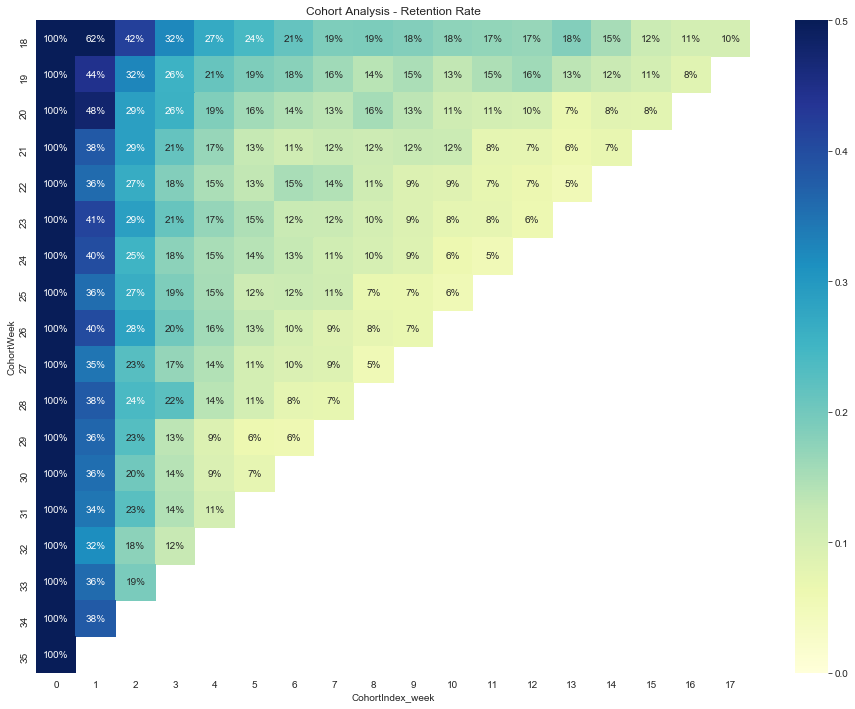

In [28]:
def create_cohort(df, var_date):
    df['Eventweek'] = df[var_date].apply(lambda x:x.isocalendar()[1])
    df['CohortWeek'] = df.groupby('user_id')['Eventweek'].transform('min')
    df['CohortIndex_week'] = df.apply(
        lambda row:row['Eventweek']-row['CohortWeek'],axis=1)
    cohort_data = df.groupby(
        ['CohortWeek', 'CohortIndex_week'])['user_id'].apply(pd.Series.nunique).reset_index()
    cohort_count = cohort_data.pivot_table(index = 'CohortWeek',
                                           columns = 'CohortIndex_week',
                                           values = 'user_id')
    # print(cohort_count)

    cohort_size = cohort_count.iloc[:,0]
    retention = cohort_count.divide(cohort_size, axis = 0)
    # print(retention.round(3) * 100)

    plt.figure(figsize = (16,12))
    plt.title('Cohort Analysis - Retention Rate')
    sns.heatmap(data = retention, 
                annot = True, 
                fmt = '.0%', 
                vmin = 0.0,
                vmax = 0.5,
                cmap = "YlGnBu")
    plt.show()
    
create_cohort(events, 'occurred_at')

*Note: Retention Rate drop at week 31 for all cohort*

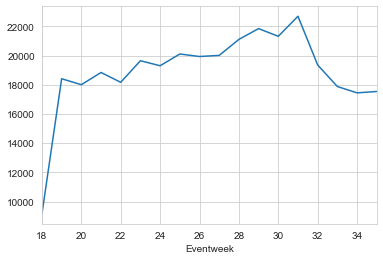

In [29]:
events.groupby('Eventweek')['user_id'].count().plot()

In [32]:
# group and check
events_group = events.groupby(
    ['Eventweek','event_type','event_name',
     'location','device','user_type']
    )['user_id'].count()
events_group = pd.DataFrame(events_group).reset_index()
# events_group.groupby('Eventweek')['user_id'].sum().plot()

In [33]:
events_group.rename(columns={'user_id':'visit'},inplace=True)

In [36]:
week_summary = events_group.iloc[:,-1].groupby(events_group.Eventweek).sum()
week_change_value = week_summary.diff(1).rename('change')
week_change_rate = (week_change_value / week_summary).round(3).rename('change_rate')
df_visit = pd.concat((week_summary, week_change_value, week_change_rate), axis=1)

# set week to evaluate
the_week = 32
previous_week = the_week - 1
df = events_group
the_week_tmp = df[df.Eventweek == the_week].rename(columns={'visit': the_week})
previous_week_tmp = df[df.Eventweek == previous_week].rename(columns={'visit': previous_week})
dimension_list = df.columns.tolist()[1:-1]
split_node_list = ['Total']
change_list = []
increase_node_list = []
decrease_node_list = []

for dimension in dimension_list:
    
    the_week_merge = the_week_tmp[[dimension, the_week]]
    previous_week_merge = previous_week_tmp[[dimension, previous_week]]
    the_week_groupby = the_week_merge.groupby(dimension).sum()
    previous_week_groupby = previous_week_merge.groupby(dimension).sum()
    merge_data = the_week_groupby.join(previous_week_groupby, how='outer')
    merge_data = merge_data.fillna(0)
    merge_data['change'] = merge_data[the_week] - merge_data[previous_week]
    merge_data['change_rate']  =  merge_data['change']  /  merge_data[previous_week]
    total_change = merge_data.change.sum()
    change_list.append(total_change)
    merge_data.sort_values('change', inplace=True)
    max_increase_node = merge_data.index[-1]
    max_value, max_rate = merge_data.loc[max_increase_node][2:4] 
    increase_node_list.append([max_increase_node,  int(max_value),  max_rate])   
    min_increase_node = merge_data.index[0]  
    min_value, min_rate = merge_data.loc[min_increase_node][2:4]  
    decrease_node_list.append([min_increase_node,  int(min_value),  min_rate])

    if total_change >= 0:
        split_node_list.append(max_increase_node)
        rules_len = len(split_node_list)
        the_week_tmp = the_week_tmp[the_week_tmp[dimension_list[rules_len-2]] == max_increase_node]
        previous_week_tmp = previous_week_tmp[previous_week_tmp[dimension_list[rules_len-2]] == max_increase_node]    
    else:
        split_node_list.append(min_increase_node)
        rules_len = len(split_node_list)
        the_week_tmp = the_week_tmp[the_week_tmp[dimension_list[rules_len-2]] == min_increase_node]
        previous_week_tmp = previous_week_tmp[previous_week_tmp[dimension_list[rules_len-2]] == min_increase_node]

In [37]:
from graphviz import Digraph

node_style = {'shape': 'box'}
edge_style = {}
top_node_style = '<<table><tr><td bgcolor="black"><font color="white">{0}</font></td></tr><tr><td>Visit # change:{1:d}</td></tr><tr><td>Visit % change:{2:.0%}</td></tr></table>>'  # 定义顶部node节点标签样式
left_node_style = '<<table><tr><td bgcolor="chartreuse"><font color="black">{0}</font></td></tr><tr><td>Visit # change:{1}</td></tr><tr><td>Visit % change:{2:.0%}</td></tr></table>>'  # 定义左侧node节点标签样式
right_node_style = '<<table><tr><td bgcolor="lightblue"><font color="black">{0}</font></td></tr><tr><td>Visit # change:{1}</td></tr><tr><td>Visit % change:{2:.0%}</td></tr></table>>'  # 定义右侧node节点标签样式
dot = Digraph(format='png', node_attr=node_style, edge_attr=edge_style)

for i in range(4):
    node_name = split_node_list[i]
    node_left, max_value, max_rate = increase_node_list[i]
    node_right, min_value, min_rate = decrease_node_list[i]
    node_change = change_list[i]
    node_label_left = left_node_style.format(node_left, max_value, max_rate)
    node_label_right = right_node_style.format(node_right, min_value, min_rate)
    if i == 0:
        week_data = df_visit[df_visit.index == the_week]
        former_data = week_data.iloc[0, 1]
        node_lable = top_node_style.format(node_name, int(former_data), week_data.iloc[0, 2])
        dot.node(node_name, label=node_lable)
    contribution_rate_1 = float(max_value) / former_data
    contribution_rate_2 = float(min_value) / former_data
    if node_change >= 0:
        edge_lablel_left = 'Positive Contribute:{0:.0%}'.format(contribution_rate_1)
        edge_lablel_right = 'Negative Contribute:{0:.0%}'.format(contribution_rate_2)
        former_data = max_value
    else:
        edge_lablel_left = 'Negative Contribute:{0:.0%}'.format(contribution_rate_1)
        edge_lablel_right = 'Positive Contribute:{0:.0%}'.format(contribution_rate_2)
        former_data = min_value
    dot.node(node_left, label=node_label_left)
    dot.node(node_right, label=node_label_right)
    dot.edge(node_name, node_left, label=edge_lablel_left, color='chartreuse')
    dot.edge(node_name, node_right, label=edge_lablel_right, color='lightblue')

dot.view('change summary')

'change summary.png'

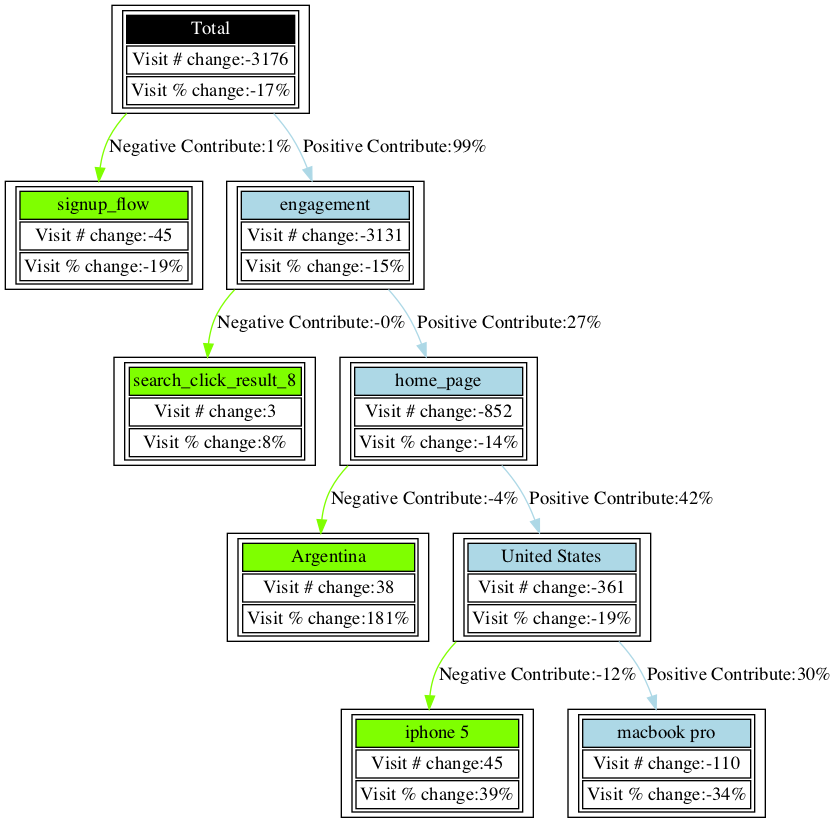

In [38]:
from IPython.display import Image
Image(filename="change summary.png")

*Note: At week 31 engagement dropped, especitally true for home_page visit from United States using macbook pro*

**Table "emails"**

In [40]:
emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [41]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
user_id        90389 non-null float64
occurred_at    90389 non-null object
action         90389 non-null object
user_type      90389 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


In [42]:
emails.isnull().sum()

user_id        0
occurred_at    0
action         0
user_type      0
dtype: int64

In [43]:
emails.action.unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [44]:
emails.user_type.unique()

array([1., 3., 2.])

In [45]:
emails['occurred_at'] = emails['occurred_at'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [46]:
emails['action'].value_counts()

sent_weekly_digest         57267
email_open                 20459
email_clickthrough          9010
sent_reengagement_email     3653
Name: action, dtype: int64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

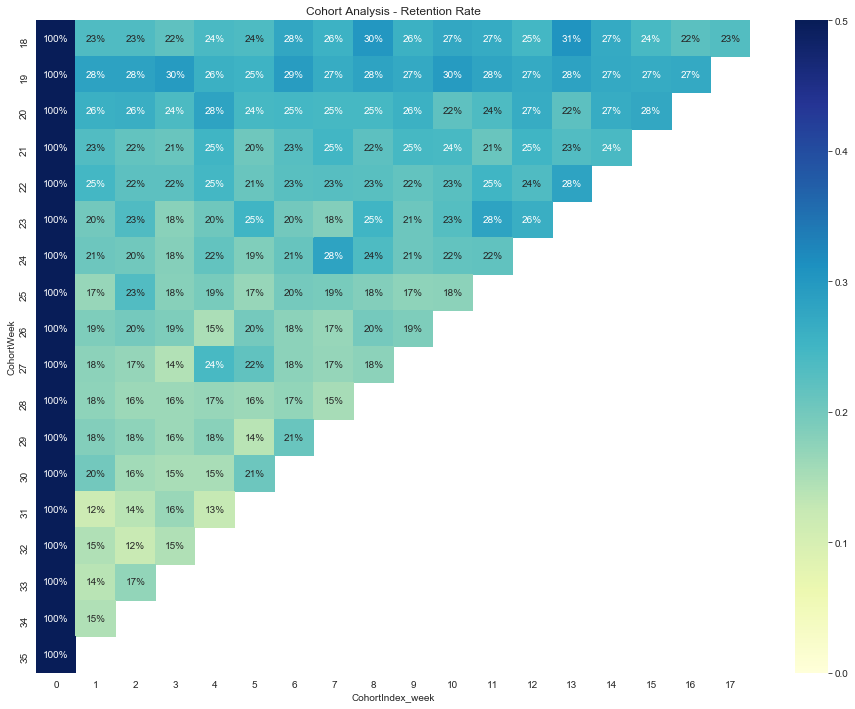

In [47]:
#check "email_open"
create_cohort(emails[emails['action']=='email_open'], 'occurred_at')

*Note: We can see there is a graduate drop for "email_open" action*

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

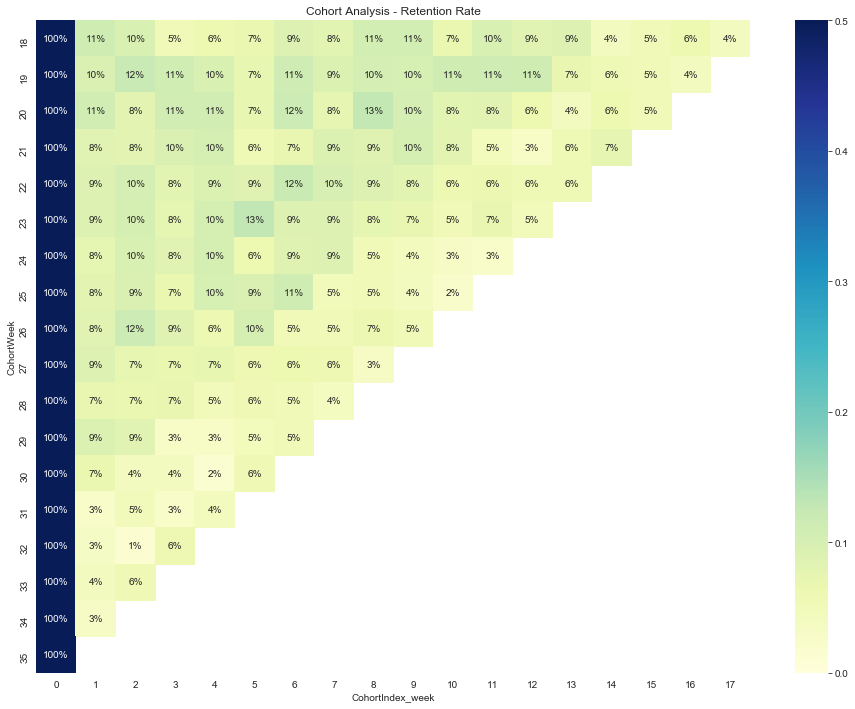

In [48]:
# check email_clickthrough
create_cohort(emails[emails['action']=='email_clickthrough'], 'occurred_at')

**Table "experiments"**

In [49]:
experiments.head()

,user_id,occurred_at,experiment,experiment_group,location,device,user_type
0,4,2014-06-05 15:20:16,publisher_update,control_group,India,lenovo thinkpad,3
1,8198,2014-06-11 09:31:32,publisher_update,control_group,Japan,nokia lumia 635,1
2,11,2014-06-17 09:31:22,publisher_update,control_group,United States,iphone 4s,1
3,8209,2014-06-04 09:31:21,publisher_update,test_group,Turkey,nokia lumia 635,1
4,19,2014-06-04 09:31:33,publisher_update,test_group,Nigeria,iphone 5,1


In [50]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
user_id             100 non-null int64
occurred_at         100 non-null datetime64[ns]
experiment          100 non-null object
experiment_group    100 non-null object
location            100 non-null object
device              100 non-null object
user_type           100 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.5+ KB


*Note: Only 100 records. Will skip.*

**Table "dimension_rollup_periods"**

In [51]:
dimension_rollup_periods.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1,2013-01-01,2013-01-01,2013-01-02,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1,2013-01-02,2013-01-02,2013-01-03,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1,2013-01-03,2013-01-03,2013-01-04,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1,2013-01-04,2013-01-04,2013-01-05,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1,2013-01-05,2013-01-05,2013-01-06,2013-01-05 08:00:00,2013-01-06 08:00:00


In [52]:
dimension_rollup_periods['period_id'].value_counts()

2007    26280
2001    26280
1007     1095
1028     1095
1        1095
2         157
Name: period_id, dtype: int64

In [53]:
dimension_rollup_periods['time_id'].dt.to_period('M').value_counts()

2015-05    1586
2015-08    1586
2013-03    1586
2014-08    1586
2015-03    1586
2014-03    1586
2013-12    1586
2014-01    1585
2015-07    1585
2013-01    1585
2015-10    1585
2015-12    1585
2013-05    1585
2013-07    1585
2013-08    1585
2013-10    1585
2014-05    1585
2014-07    1585
2015-01    1585
2014-12    1585
2014-10    1585
2015-11    1535
2014-11    1535
2013-09    1535
2014-06    1535
2013-06    1535
2015-06    1534
2015-09    1534
2015-04    1534
2013-11    1534
2013-04    1534
2014-09    1534
2014-04    1534
2013-02    1432
2015-02    1432
2014-02    1432
2012-12       1
Freq: M, Name: time_id, dtype: int64

*Note: Don't quite understand this table. Will skip.*

**The Problem**  
**What caused the drop in user engagement? Based on what you observe in the data, what recommendations would you make to the organization?**  
The major drop come from users from US using macbook pro. At the same time, the email open rate dropped quickly. The company should consider update its email strategy to increase email open rate.